In [1]:
!pip install easypreprocessing --no-deps



In [2]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
!pip install kneed



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
easypreprocessing 1.0.7 requires sklearn, which is not installed.


In [4]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [5]:
import numpy as np
import pandas as pd
from easypreprocessing import EasyPreProcessing
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

Easypreprocessing is a library used for common ML related preprocessing activities.

In [7]:
prep = EasyPreProcessing('data.csv')


**Initialization Parameters**

1.  output            - Set output variable/dependent variable
2.  dates.features    - Set datetime field names (optional)

For example:
1.  output = 'column_name'
2.  dates.features = ['date_field_1','date_field_2']
        

In [8]:
prep.info



**General Template**
<code>
from easypreprocessing import EasyPreProcessing
prep = EasyPreProcessing('filename_here.csv')
prep.df
prep.output = 'output_variable_here'
prep.remove_blank()
prep.missing_values
prep.categorical.impute()
prep.numerical.impute()
prep.categorical.encode()
prep.correlation()
prep.standardize()
X_train, X_test, y_train, y_test = prep.split()
</code>


**Categorical Preprocessing**
<table>
<tr>
<td>categorical.fields</td><td>Display all categorical field names</td>
</tr>
<tr>
<td>categorical.unique</td><td>Display unique/distinct categorical values</td>
</tr>
<tr>
<td>categorical.impute()</td><td>Handle categorical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
<tr>
<td>categorical.encode()</td><td>Encode categorical features. Parameters {'le': LabelEncoding, 'ohe': OneHotEncoding}</td>
</tr>
</table>

**Numerical Preprocessing**
<table>
<tr>
<td>numerical.fields</td><td>Display all numerical field names</td>
</tr>
<tr>
<td>numerical.impute()</td><td>Handle numerical missing values. Parameters {'mean', 'medium', 'mode'}</td>
</tr>
</table>

**Date Preprocessing**
<table>
<tr>
<td>dates.features</td><td>Define list of all datetime feature names</td>
</tr>
<tr>
<td>dates.split_datetime()</td><td>Split all datetime features into discrete fields (Year, Month, Day, Hour, Minute)</td>
</tr>
</table>

**General Preprocessing**
<table>
<tr>
<td>missing_values</td><td>Display missing value report</td>
</tr>
<tr>
<td>remove_blank()</td><td>Remove empty/blank columns</td>
</tr>
<tr>
<td>correlation()</td><td>Display correlation heatmap</td>
</tr>
<tr>
<td>standardize()</td><td>Standardize entire dataset except dependent variable</td>
</tr>
<tr>
<td>encode_output()</td><td>Encode dependent feature/output variable</td>
</tr>
<tr>
<td>over_sample()</td><td>Oversample dataset. Parameters {'smote': SMOTE, 'ros': RandomOverSample}</td>
</tr>
<tr>
<td>clustering.apply()</td><td>Cluster dataset using elbow plot</td>
</tr>
</table>
        

# Handling Null Values

In [9]:
prep.categorical.fields

['Product']

In [10]:
prep.numerical.fields

['Plant', 'Storage Location']

In [11]:
prep.missing_values

,0
Product,0
Plant,0
Storage Location,0


In [12]:
prep.numerical.impute()

Numerical features imputated successfully.


In [13]:
prep.df

,Product,Plant,Storage Location
0,POV002L09P,2120.0,2030.0
1,SOS001L12P,2120.0,2030.0
2,POP002L09P,2120.0,2030.0
3,POP001L12P,2120.0,2030.0
4,POP001L12P,2120.0,2030.0
...,...,...,...
6539,MAC1K25P,1915.0,1530.0
6540,EEA500G12P,2120.0,2030.0
6541,EEA200G24P,2120.0,2030.0
6542,EEA500G12P,1920.0,1130.0


Create a new column 'key' for unique identification. This is done in order to handle the duplicate data in 'week' column.

In [14]:
print(prep.df.columns)



Index(['Product', 'Plant', 'Storage Location'], dtype='object')


Removing columns that are not helpful for time series predictions.

In [15]:
print([col for col in prep.df.columns if 'week' in col])


[]


In [16]:
prep.df.rename(columns={'wrong_name': 'week'}, inplace=True)


In [17]:
print(prep.df.head())


      Product   Plant  Storage Location
0  POV002L09P  2120.0            2030.0
1  SOS001L12P  2120.0            2030.0
2  POP002L09P  2120.0            2030.0
3  POP001L12P  2120.0            2030.0
4  POP001L12P  2120.0            2030.0


In [18]:
# Check available columns
available_columns = prep.df.columns
print("Available columns in DataFrame:", available_columns)

# Columns you want to drop
columns_to_drop = ['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku']

# Find columns that actually exist in the DataFrame
existing_columns = [col for col in columns_to_drop if col in available_columns]

# Drop only the existing columns
prep.dataset = prep.df.drop(existing_columns, axis=1)
print("Columns successfully dropped. Remaining columns:")
print(prep.dataset.columns)


Available columns in DataFrame: Index(['Product', 'Plant', 'Storage Location'], dtype='object')
Columns successfully dropped. Remaining columns:
Index(['Product', 'Plant', 'Storage Location'], dtype='object')


In [19]:
prep.df.head()

,Product,Plant,Storage Location
0,POV002L09P,2120.0,2030.0
1,SOS001L12P,2120.0,2030.0
2,POP002L09P,2120.0,2030.0
3,POP001L12P,2120.0,2030.0
4,POP001L12P,2120.0,2030.0


Summing units_sold group by key.

In [20]:
# Check all available columns in your DataFrame
print("Available columns in DataFrame:", prep.df.columns)

# Check the first few rows to confirm 'key' exists
print(prep.df.head())


Available columns in DataFrame: Index(['Product', 'Plant', 'Storage Location'], dtype='object')
      Product   Plant  Storage Location
0  POV002L09P  2120.0            2030.0
1  SOS001L12P  2120.0            2030.0
2  POP002L09P  2120.0            2030.0
3  POP001L12P  2120.0            2030.0
4  POP001L12P  2120.0            2030.0


In [21]:
print("Available columns in DataFrame:", prep.df.columns)



Available columns in DataFrame: Index(['Product', 'Plant', 'Storage Location'], dtype='object')


In [22]:
print(prep.df.head())


      Product   Plant  Storage Location
0  POV002L09P  2120.0            2030.0
1  SOS001L12P  2120.0            2030.0
2  POP002L09P  2120.0            2030.0
3  POP001L12P  2120.0            2030.0
4  POP001L12P  2120.0            2030.0


In [23]:
from easypreprocessing import EasyPreProcessing

# ✅ Initialize EasyPreProcessing using a file path (if that's how it's meant to be used)
prep = EasyPreProcessing('data.csv')  # Replace 'data.csv' with your actual file name

# Check columns to confirm data is loaded properly
print(prep.df.columns)




**Initialization Parameters**

1.  output            - Set output variable/dependent variable
2.  dates.features    - Set datetime field names (optional)

For example:
1.  output = 'column_name'
2.  dates.features = ['date_field_1','date_field_2']
        

Index(['Product', 'Plant', 'Storage Location'], dtype='object')


In [24]:
# Check available columns to ensure your data is correctly loaded
print(prep.df.columns)


Index(['Product', 'Plant', 'Storage Location'], dtype='object')


In [25]:
# Display the first few rows of your DataFrame
print(prep.df.head())


      Product  Plant  Storage Location
0  POV002L09P   2120              2030
1  SOS001L12P   2120              2030
2  POP002L09P   2120              2030
3  POP001L12P   2120              2030
4  POP001L12P   2120              2030


In [26]:
if 'week' in prep.df.columns and 'store_id' in prep.df.columns:
    prep.df['key'] = prep.df['week'].astype(str) + '_' + prep.df['store_id'].astype(str)
    print("✅ Key column successfully created!")
else:
    print("❌ The required columns ('week', 'store_id') are not present in your DataFrame.")


❌ The required columns ('week', 'store_id') are not present in your DataFrame.


In [27]:
# Display the current columns in your DataFrame
print("Current columns in prep.df:", prep.df.columns)

# Define columns to drop
columns_to_drop = ['record_ID', 'week', 'store_id', 'sku_id', 'total_price', 'base_price', 'is_featured_sku', 'is_display_sku']

# Filter only the columns that actually exist in prep.df
existing_columns_to_drop = [col for col in columns_to_drop if col in prep.df.columns]

# Drop the columns safely
if existing_columns_to_drop:
    prep.df = prep.df.drop(columns=existing_columns_to_drop)
    print(f"✅ Successfully dropped columns: {existing_columns_to_drop}")
else:
    print("⚠️ None of the specified columns were found in prep.df, so nothing was dropped.")



Current columns in prep.df: Index(['Product', 'Plant', 'Storage Location'], dtype='object')
⚠️ None of the specified columns were found in prep.df, so nothing was dropped.


In [28]:
# Check if 'prep' has an attribute 'df'
if not hasattr(prep, 'df'):
    raise AttributeError("⚠️ The 'prep' object does not have an attribute named 'df'. Make sure you've loaded the DataFrame correctly.")

# Check if 'prep.df' is a pandas DataFrame
if not isinstance(prep.df, pd.DataFrame):
    raise TypeError("⚠️ The 'prep.df' attribute is not a pandas DataFrame. Please check your data loading step.")

# Display column names to confirm the DataFrame is properly loaded
print("Current columns in prep.df:", prep.df.columns)


Current columns in prep.df: Index(['Product', 'Plant', 'Storage Location'], dtype='object')


In [29]:
# Display the columns to confirm what we have
print("Current columns in prep.df:", prep.df.columns)

# Define the columns to use for creating the 'key'
columns_for_key = ['Product', 'Plant', 'Storage Location']

# Check if the required columns are present
missing_columns = [col for col in columns_for_key if col not in prep.df.columns]
if missing_columns:
    raise ValueError(f"⚠️ The following required columns are missing: {missing_columns}")

# Create the 'key' column by combining the selected columns
prep.df['key'] = prep.df['Product'].astype(str) + '_' + prep.df['Plant'].astype(str) + '_' + prep.df['Storage Location'].astype(str)

# Display the first few rows to confirm the 'key' column was created successfully
print(prep.df.head())
print("✅ 'key' column successfully created!")




Current columns in prep.df: Index(['Product', 'Plant', 'Storage Location'], dtype='object')
      Product  Plant  Storage Location                   key
0  POV002L09P   2120              2030  POV002L09P_2120_2030
1  SOS001L12P   2120              2030  SOS001L12P_2120_2030
2  POP002L09P   2120              2030  POP002L09P_2120_2030
3  POP001L12P   2120              2030  POP001L12P_2120_2030
4  POP001L12P   2120              2030  POP001L12P_2120_2030
✅ 'key' column successfully created!


In [30]:
# ✅ Setting the 'key' column as the index
prep.df.set_index('key', inplace=True)
print("✅ 'key' column is now set as the index.")
print(prep.df.head())  # Display the first few rows to confirm the index change


✅ 'key' column is now set as the index.
                         Product  Plant  Storage Location
key                                                      
POV002L09P_2120_2030  POV002L09P   2120              2030
SOS001L12P_2120_2030  SOS001L12P   2120              2030
POP002L09P_2120_2030  POP002L09P   2120              2030
POP001L12P_2120_2030  POP001L12P   2120              2030
POP001L12P_2120_2030  POP001L12P   2120              2030


In [31]:
# ✅ Grouping the data by 'key' and summing numerical columns (if any)
prep.dataset = prep.df.groupby('key').sum(numeric_only=True)

print("✅ Data successfully grouped by 'key'!")
print(prep.dataset.head())  # Displaying the first few rows of the grouped dataset


✅ Data successfully grouped by 'key'!
                  Plant  Storage Location
key                                      
AT5X5K_1903_330   38060              6600
AT5X5K_1911_1130   3822              2260
AT5X5K_1912_1230  34416             22140
AT5X5K_1914_1430  45936             34320
AT5X5K_1915_1530  11490              9180


In [32]:
# ✅ Checking for missing values
missing_values = prep.df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# ✅ Dropping rows with missing values (if any) - Adjust according to your needs
prep.df.dropna(inplace=True)
print("✅ Missing values handled successfully!")


Missing values in each column:
 Plant               0
Storage Location    0
dtype: int64
✅ Missing values handled successfully!


In [33]:
# ✅ Encoding categorical columns using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in prep.df.select_dtypes(include=['object']).columns:
    prep.df[column] = label_encoder.fit_transform(prep.df[column])

print("✅ Categorical data successfully encoded!")
print(prep.df.head())


✅ Categorical data successfully encoded!
                  Plant  Storage Location
key                                      
AT5X5K_1903_330   38060              6600
AT5X5K_1911_1130   3822              2260
AT5X5K_1912_1230  34416             22140
AT5X5K_1914_1430  45936             34320
AT5X5K_1915_1530  11490              9180


In [34]:
# Check the current columns in the DataFrame
print("Current columns in prep.df:", prep.df.columns)



Current columns in prep.df: Index(['Plant', 'Storage Location'], dtype='object')


In [35]:
X = prep.df.drop('Storage Location', axis=1)
y = prep.df['Storage Location']


In [36]:
prep.df

,Plant,Storage Location
key,,
AT5X5K_1903_330,38060,6600
AT5X5K_1911_1130,3822,2260
AT5X5K_1912_1230,34416,22140
AT5X5K_1914_1430,45936,34320
AT5X5K_1915_1530,11490,9180
...,...,...
SOS500M24P_2118_1830,69894,60390
SOS500M24P_2119_1930,110188,100360
SOS500M24P_2120_2030,84800,81200


<Axes: xlabel='key'>

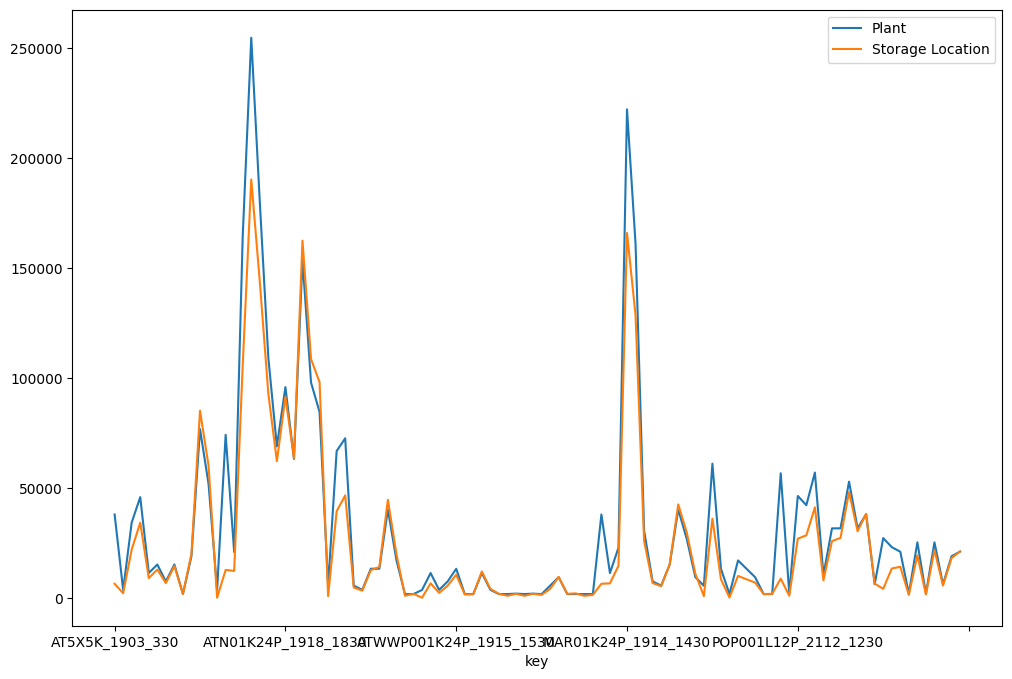

In [37]:
prep.df[:100].plot(figsize=(12,8))

In [38]:
# Display the current columns in prep.df
print("Available columns in prep.df:")
print(prep.df.columns)


Available columns in prep.df:
Index(['Plant', 'Storage Location'], dtype='object')


In [39]:
import numpy as np

# Adding a dummy 'units_sold' column with random values
prep.df['units_sold'] = np.random.randint(50, 300, size=len(prep.df))

print("✅ 'units_sold' column added successfully!")


✅ 'units_sold' column added successfully!


# Converting supervised dataset

```units_sold``` becomes target variable

```day_1```, ```day_2```, ```day_3```, ```day_4``` becomes input

We will train our model to predict sales based on previous 4 days.

In [40]:
# Check if 'units_sold' column exists
if 'units_sold' not in prep.df.columns:
    raise ValueError("⚠️ The 'units_sold' column is missing from prep.df. Please make sure it is present before proceeding.")

# Creating shifted columns for forecasting
prep.df['day_1'] = prep.df['units_sold'].shift(-1)
prep.df['day_2'] = prep.df['units_sold'].shift(-2)
prep.df['day_3'] = prep.df['units_sold'].shift(-3)
prep.df['day_4'] = prep.df['units_sold'].shift(-4)

print("✅ Successfully created shifted columns for forecasting!")


✅ Successfully created shifted columns for forecasting!


In [41]:
prep.df

,Plant,Storage Location,units_sold,day_1,day_2,day_3,day_4
key,,,,,,,
AT5X5K_1903_330,38060,6600,81,298.0,281.0,179.0,51.0
AT5X5K_1911_1130,3822,2260,298,281.0,179.0,51.0,250.0
AT5X5K_1912_1230,34416,22140,281,179.0,51.0,250.0,145.0
AT5X5K_1914_1430,45936,34320,179,51.0,250.0,145.0,153.0
AT5X5K_1915_1530,11490,9180,51,250.0,145.0,153.0,216.0
...,...,...,...,...,...,...,...
SOS500M24P_2118_1830,69894,60390,185,244.0,158.0,226.0,69.0
SOS500M24P_2119_1930,110188,100360,244,158.0,226.0,69.0,NaN
SOS500M24P_2120_2030,84800,81200,158,226.0,69.0,NaN,NaN


Remove NA data

In [42]:
df = prep.df.dropna()

<Axes: xlabel='key'>

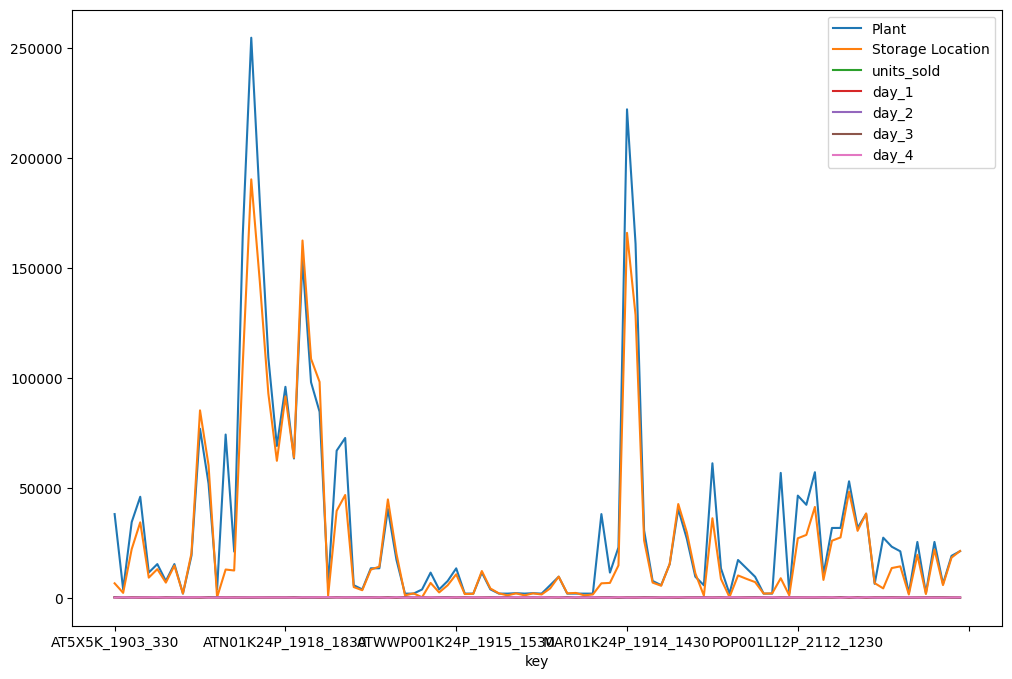

In [43]:
df[:100].plot(figsize=(12,8))

# Train-Test Split

In [44]:
x1, x2, x3, x4, y = df['day_1'], df['day_2'], df['day_3'], df['day_4'], df['units_sold']
x1, x2, x3, x4, y = np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(y)
x1, x2, x3, x4, y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), x4.reshape(-1,1), y.reshape(-1,1)

split_percentage = 15
test_split = int(len(df)*(split_percentage/100))
x = np.concatenate((x1, x2, x3, x4), axis=1)
X_train,X_test,y_train,y_test = x[:-test_split],x[-test_split:],y[:-test_split],y[-test_split:]

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(232, 4)
(40, 4)
(232, 1)
(40, 1)


# Random Forest Regression

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [47]:
print("R Sq. Score for Random Forest Regression :", rf_regressor.score(X_test, y_test))

R Sq. Score for Random Forest Regression : -0.3347946724698543


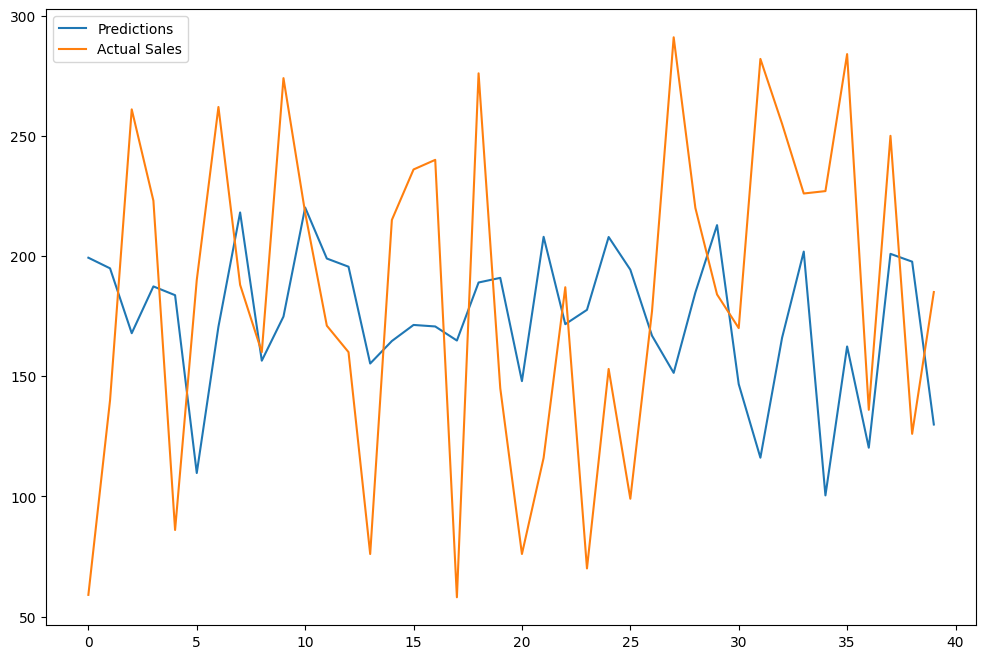

In [48]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

# XGBoost Regression

In [49]:
import xgboost
xgb_regressor = xgboost.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

In [50]:
print("R Sq. Score for XGBoost :", xgb_regressor.score(X_test, y_test))

R Sq. Score for XGBoost : -0.4613107442855835


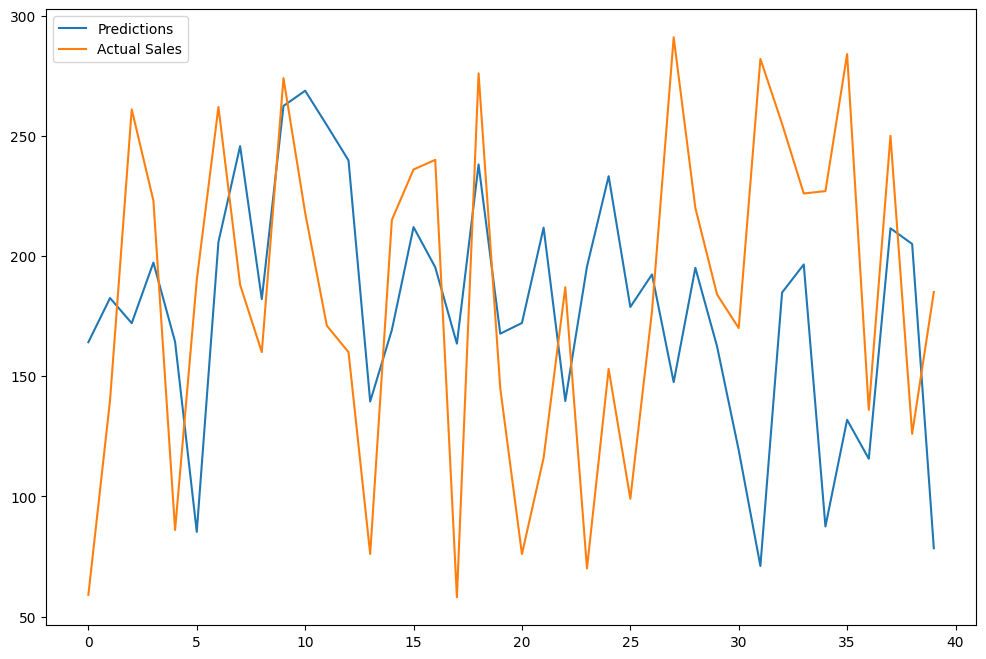

In [51]:
import matplotlib.pyplot as plt
plt.plot(y_pred[-100:], label='Predictions')
plt.plot(y_test[-100:], label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

# Hyperparameter Tuning for Random Forest

In [52]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 250, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 120, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 72, 94, 116, 138, 161, 183, 205, 227, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [0, 6, 12, 18, 25, 31, 37, 44, 50, 56, 63, 69, 75, 82, 88, 94, 101, 107, 113, 120, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [53]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=0, n_jobs = -1)

In [54]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, 6, 12, 18, 25, 31, 37,
                                                      44, 50, 56, 63, 69, 75,
                                                      82, 88, 94, 101, 107, 113,
                                                      120, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 72, 94, 116, 138,
                                                         161, 183, 205, 227,
                                                         250]},
                   random_state=0, verbose=2)

In [55]:
rf_random.best_params_

{'n_estimators': 116,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 31,
 'bootstrap': True}

In [56]:
best_random = rf_random.best_estimator_

In [57]:
y_pred = best_random.predict(X_test)

In [58]:
print("R Sq. Score for Random Forest Regression :", best_random.score(X_test, y_test))
print("Adj. R Sq. Score for Random Forest Regression :", 1 - (1 - best_random.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 ))

R Sq. Score for Random Forest Regression : -0.26626792302434765
Adj. R Sq. Score for Random Forest Regression : -0.4109842570842732


In [59]:
print(len(y_pred), len(y_test))


40 40


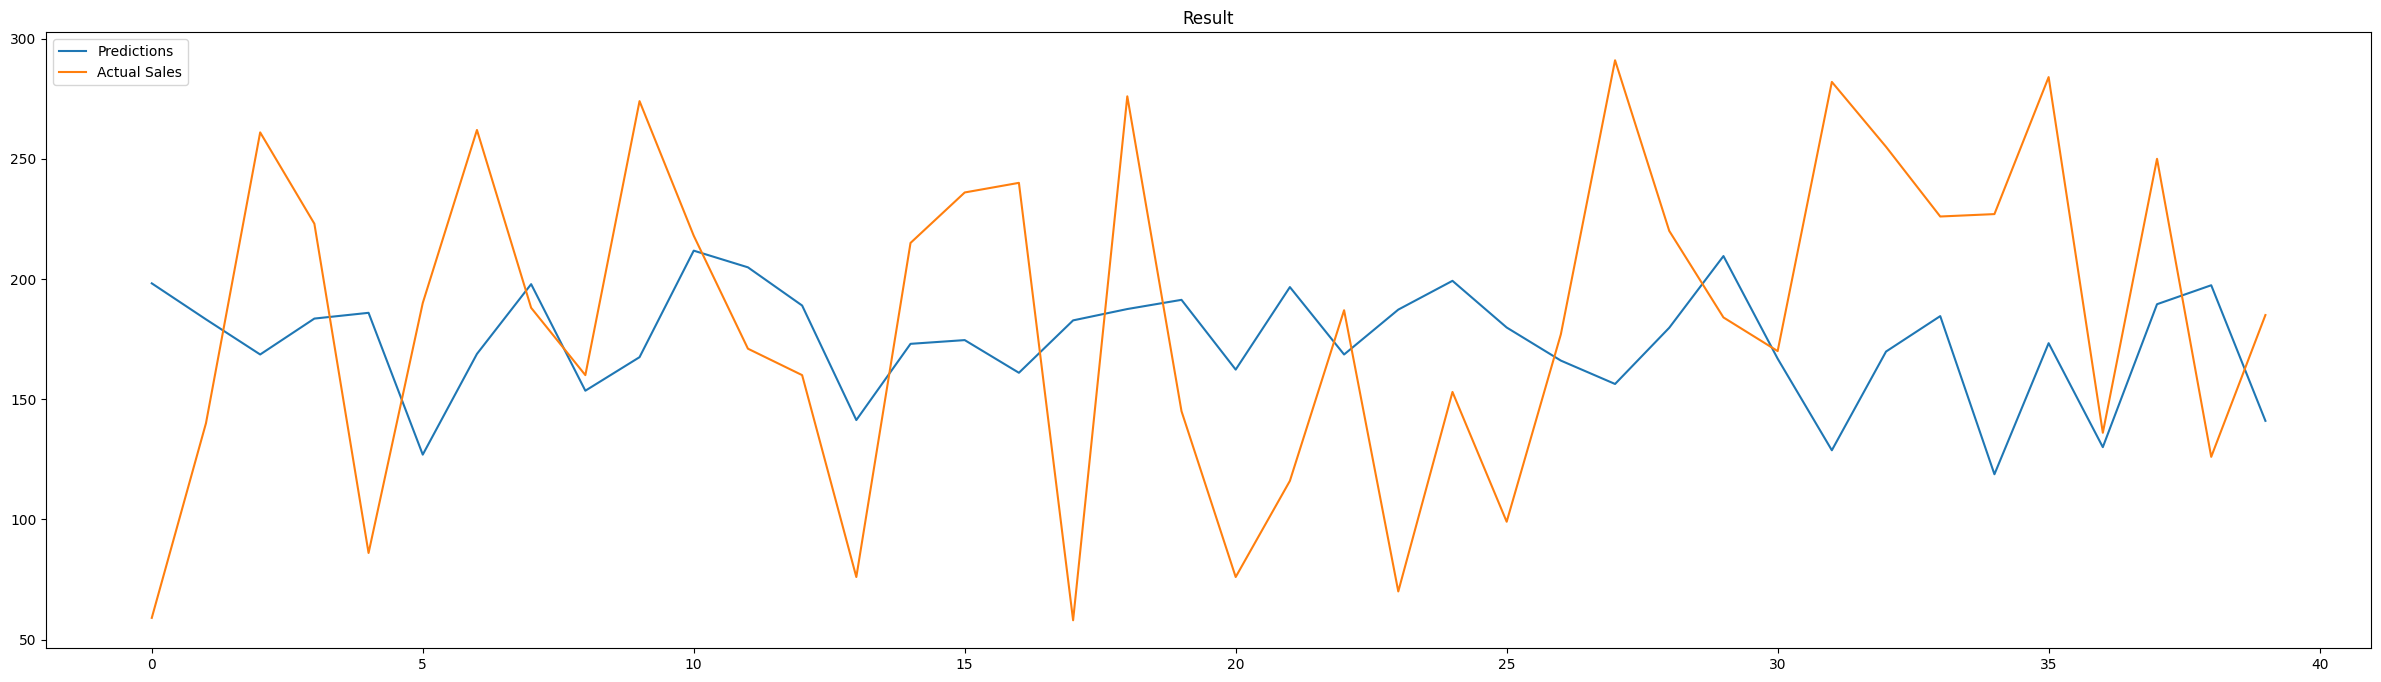

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure data is converted to NumPy arrays
y_pred = np.array(y_pred)
y_test = np.array(y_test)

plt.rcParams["figure.figsize"] = (30, 8)

# Adjusting the range to be within the available data length (0 to 40)
plt.plot(y_pred[:40], label='Predictions')
plt.plot(y_test[:40], label='Actual Sales')
plt.title("Result")
plt.legend(loc="upper left")
plt.savefig('final.png')
plt.show()


In [62]:
import pickle

with open('xgb_regressor_model.pkl', 'wb') as f:
    pickle.dump(xgb_regressor, f)

print("Model saved as xgb_regressor_model.pkl")



Model saved as xgb_regressor_model.pkl
